<a href="https://colab.research.google.com/github/BrunoBerval/dio_project4/blob/main/Treinamento_e_detec%C3%A7%C3%A3o_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de imagens utilizando a Rede YOLO
Este projeto tem como objetivo aplicar técnicas de detecção de objetos utilizando o modelo YOLO (You Only Look Once), uma das soluções mais rápidas e precisas para reconhecimento em tempo real. O projeto foi desenvolvido no Google Colab e visa treinar e testar o modelo com um conjunto de dados de imagens urbanas, buscando identificar objetos presentes nas imagens divididos em três categorias: cyclists (ciclistas), pedestrians (pedestres) e cars (carros). O projeto é uma aplicação prática da visão computacional em um contexto real, e pode oferecer uma base para futuras melhorias e adaptações em áreas como monitoramento e análise de tráfego.



---
#Image Detection Using the YOLO Network
This project aims to apply object detection techniques using the YOLO (You Only Look Once) model, one of the fastest and most accurate solutions for real-time recognition. The project was developed in Google Colab and focuses on training and testing the model with a dataset of urban images, aiming to identify objects in the images divided into three categories: cyclists, pedestrians, and cars. The project is a practical application of computer vision in a real-world context and can provide a foundation for future improvements and adaptations in areas such as monitoring and traffic analysis.


Vamos começar conectando o Google Drive à máquina virtual do Colab, montando-o no diretório /content/gdrive. Isso permite acessar arquivos no Google Drive como se fossem parte do sistema de arquivos local do Colab.



---
Let's start by connecting Google Drive to the Colab virtual machine, mounting it in the /content/gdrive directory. This allows access to files in Google Drive as if they were part of the local file system of Colab.


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive



Essa célula define o caminho para o diretório city_dataset no Google Drive e o armazena na variável ROOT_DIR.

A base de dados city_dataset foi criada a partir da pesquisa e download de imagens de trânsito urbano no Google Imagens, em conjunto com a utilização da ferramenta CVAT (Computer Vision Annotation Tool) para criar as labels (rótulos) das imagens. O CVAT é uma ferramenta de anotação de imagens que facilita o processo de rotulagem manual, sendo muito útil em projetos de visão computacional. As labels foram obtidas desenhando-se caixas delimitadoras (bounding boxes) ao redor dos objetos de interesse, no caso do projeto: ciclistas, pedestres e carros. Essas caixas são associadas as classes e permitem ao modelo entender o que está sendo detectado em cada caixa.
Feito isso, salvei a base dados no Google Drive e a partir de lá ela será disponibilizada para este projeto



---
This cell defines the path to the city_dataset directory in Google Drive and stores it in the ROOT_DIR variable.

The city_dataset database was created by researching and downloading urban traffic images from Google Images, along with using the CVAT (Computer Vision Annotation Tool) to create the labels for the images. CVAT is an image annotation tool that simplifies the manual labeling process, making it very useful in computer vision projects. The labels were obtained by drawing bounding boxes around the objects of interest, in this project: cyclists, pedestrians, and cars. These boxes are associated with the classes and allow the model to understand what is being detected within each box. Afterward, I saved the database on Google Drive, and from there, it will be made available for this project.


In [3]:
ROOT_DIR = '/content/gdrive/My Drive/city_dataset'

Ultralytics é uma empresa e uma biblioteca de código aberto focada no desenvolvimento e implementação de modelos de aprendizado profundo, com ênfase em tarefas de visão computacional, como detecção de objetos, segmentação e rastreamento. A biblioteca mais conhecida da Ultralytics é a implementação do modelo YOLO (You Only Look Once), que é uma das arquiteturas mais populares e eficientes para detecção de objetos em tempo real.



---
Ultralytics is a company and an open-source library focused on the development and implementation of deep learning models, with an emphasis on computer vision tasks such as object detection, segmentation, and tracking. The most well-known library from Ultralytics is the implementation of the YOLO (You Only Look Once) model, which is one of the most popular and efficient architectures for real-time object detection.


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 15.7 MB/s eta 0:00:00


Essa célula importa a biblioteca `os` para manipulação de diretórios e arquivos, e importa o módulo `YOLO`. YOLO (You Only Look Once) foi inicialmente desenvolvido por Joseph Redmon em 2015. A principal inovação do YOLO foi a sua abordagem de detecção de objetos em uma única etapa, o que o torna muito mais rápido que outras arquiteturas, que frequentemente requerem múltiplas etapas para identificar e classificar objetos.
A Ultralytics entrou em cena para fornecer uma implementação de código aberto mais acessível e eficiente do YOLO. A empresa e seus desenvolvedores colaboraram para criar uma versão otimizada e facilmente utilizável da arquitetura YOLO, com foco em alto desempenho e facilidade de uso. Essa implementação foi chamada de Ultralytics YOLO ou YOLOv5 (apesar de não ser diretamente associada aos criadores originais de YOLO, ela se tornou uma das versões mais populares, especialmente no ecossistema de código aberto). Atualmente o modelo está na versão YOLO11, entretanto para este projeto utilizaremos o modelo YOLOv8.



---
This cell imports the `os` library for handling directories and files, and imports the `YOLO` module. YOLO (You Only Look Once) was initially developed by Joseph Redmon in 2015. The main innovation of YOLO was its single-stage object detection approach, which makes it much faster than other architectures that often require multiple stages to identify and classify objects.
Ultralytics came into the scene to provide a more accessible and efficient open-source implementation of YOLO. The company and its developers collaborated to create an optimized and easy-to-use version of the YOLO architecture, focusing on high performance and ease of use. This implementation was called Ultralytics YOLO or YOLOv5 (although it is not directly associated with the original creators of YOLO, it became one of the most popular versions, especially in the open-source ecosystem). Currently, the model is in version YOLO11, but for this project, we will use the YOLOv8 model.


In [5]:
import os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


A célula abaixo será responsável pelo seguinte:

*   Definir  o caminho do arquivo de configuração usando os.path.join com ROOT_DIR.
*   Instanciar o modelo YOLO com a configuração yolov8n.yaml, iniciando o modelo do zero. A letra 'n' indica que o modelo será usado na versão nano, que é uma versão mais leve ideal para ambientes como o do Colab
*   Treinar o modelo usando o arquivo de configuração, com 600 épocas.
*   Salvar o modelo treinado como yolov8n_trained.pt.

Como funciona o arquivo de configuração?

O arquivo de configuração config.yaml é crucial para orientar o treinamento do modelo YOLO. Ele geralmente inclui:

*   Caminhos para os dados: Diretórios para os conjuntos de dados de treino e validação.
*   Classes: Lista de classes de objetos que o modelo deve detectar.
*   Hiperparâmetros: Como taxa de aprendizado, tamanho do lote, e número de épocas.
*   Ajustes de pré-processamento: Como dimensionamento de imagens, aumentos de dados, e normalizações.

Esse arquivo organiza e centraliza as configurações, facilitando ajustes e reproduções do treinamento. Neste projeto o arquivo de configuração define os caminhos no Drive e as classes: cyclists, pedestrians e cars.



---

The cell below will be responsible for the following:

*   Define the configuration file path using os.path.join with ROOT_DIR.
*   Instantiate the YOLO model with the yolov8n.yaml configuration, initializing the model from scratch. The letter 'n' indicates that the model will be used in the nano version, which is a lighter version ideal for environments like Colab.
*   Train the model using the configuration file, for 600 epochs.
*   Save the trained model as yolov8n_trained.pt.

How does the configuration file work?
The config.yaml configuration file is crucial for guiding the YOLO model training. It typically includes:

*   Paths to the data: Directories for the training and validation datasets.
*   Classes: A list of object classes the model should detect.
*   Hyperparameters: Such as learning rate, batch size, and number of epochs.
*   Preprocessing adjustments: Like image scaling, data augmentation, and normalization.

This file organizes and centralizes the settings, making it easier to adjust and reproduce the training. In this project, the configuration file defines the paths on Drive and the classes: cyclists, pedestrians, and cars.

In [6]:
# Caminho para o arquivo de configuração
config_path = os.path.join(ROOT_DIR, ROOT_DIR+"/config/config.yaml")

# Instanciar o modelo YOLO
model = YOLO("yolov8n.yaml")  # Construir um novo modelo do zero

# Treinar o modelo
results = model.train(data=config_path, epochs=600)

# Salvar o modelo treinado
model.save('/content/yolov8n_trained.pt')

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/My Drive/city_dataset/config/config.yaml, epochs=600, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.1MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/city_dataset/labels/train.cache... 49 images, 2 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gdrive/My Drive/city_dataset/labels/train.cache... 49 images, 2 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/600      2.34G      3.853      4.259      4.297         14        640: 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         49        273    0.00178     0.0881    0.00106   0.000312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/600      2.12G      4.103      4.378      4.276          6        640: 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         49        273    0.00178     0.0881    0.00104   0.000308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/600      2.26G      3.801      4.305      4.298          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49        273    0.00191     0.0906     0.0012    0.00031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/600      2.27G       3.87      4.143      4.242         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         49        273    0.00171     0.0832    0.00105   0.000303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/600      2.22G      4.021      4.114      4.192         41        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         49        273    0.00192      0.093    0.00118    0.00032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/600      2.13G      3.635      4.085      4.216         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         49        273    0.00193      0.093    0.00118   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/600      2.26G       4.05       4.04      4.178         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49        273    0.00194      0.093    0.00118   0.000321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/600      2.23G      3.622      3.972      4.145         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         49        273    0.00194      0.093    0.00123   0.000334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/600      2.19G      3.528      3.811        4.1         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         49        273    0.00192      0.093    0.00115   0.000318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/600      2.23G      3.478      3.653      4.058         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         49        273    0.00196     0.0954    0.00133   0.000366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/600      2.22G      3.484        3.7      3.967          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         49        273    0.00185     0.0905    0.00112   0.000369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/600      2.25G      3.644      3.528      3.971         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         49        273    0.00185     0.0905    0.00117   0.000384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/600      2.22G      3.338       3.53      3.898         21        640: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49        273    0.00189     0.0785    0.00118   0.000381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/600      2.25G       3.34      3.566      3.885          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49        273    0.00183     0.0736    0.00114   0.000393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/600      2.28G      3.087      3.421      3.756          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         49        273    0.00171     0.0664     0.0011   0.000364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/600      2.28G      3.561      3.242      3.779         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]


                   all         49        273    0.00182     0.0713    0.00121   0.000326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/600      2.28G      3.716      3.414      3.708         24        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         49        273    0.00168     0.0664    0.00104   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/600      2.25G      3.417       3.25      3.641         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         49        273      0.002     0.0664     0.0017   0.000399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/600      2.24G      3.342      3.321      3.593         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49        273    0.00218     0.0615    0.00149   0.000379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/600      2.24G      2.961      3.253      3.534          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         49        273     0.0024     0.0664    0.00393   0.000614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/600      2.25G      3.042      3.152      3.544          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49        273     0.0022     0.0565    0.00168   0.000358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/600      2.27G      2.849      3.084       3.34          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         49        273     0.0025     0.0614    0.00238    0.00047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/600      2.27G      2.841      3.205      3.214          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]


                   all         49        273     0.0026     0.0614    0.00209   0.000411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/600       2.2G      2.718      3.548      3.303          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]


                   all         49        273    0.00229     0.0516    0.00641   0.000844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/600      2.28G      3.048      3.293      3.365          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]


                   all         49        273    0.00263     0.0515     0.0065   0.000978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/600      2.26G      2.842      3.126      3.293         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         49        273    0.00363     0.0637    0.00218   0.000599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/600      2.35G      3.378      4.038      3.455          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         49        273      0.005     0.0956    0.00313   0.000768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/600      2.27G      2.816      3.132       3.26          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         49        273     0.0048       0.11    0.00377    0.00121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/600      2.32G      2.798      2.924      3.146         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273    0.00354     0.0735     0.0033    0.00098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/600      2.23G      2.816      3.085      3.228          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         49        273    0.00331     0.0638    0.00306   0.000905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/600      2.28G      2.815      2.892      3.122         28        640: 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         49        273    0.00339     0.0713    0.00385    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/600      2.35G      2.697      3.032      3.091          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]


                   all         49        273     0.0046     0.0981     0.0111    0.00274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/600      2.34G      2.675      3.146       3.09          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49        273      0.459    0.00732     0.0135    0.00386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/600      2.25G      2.686      2.958      3.122          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         49        273      0.446     0.0244      0.021    0.00521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/600      2.27G      2.801       2.71      3.033         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         49        273     0.0423     0.0488     0.0119     0.0036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/600      2.27G      2.745       2.83      2.996         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273     0.0629      0.066     0.0198    0.00657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/600      2.36G       2.76      2.659      2.978         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         49        273      0.101     0.0957     0.0412     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/600      2.22G       2.53      2.852      2.965          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         49        273     0.0835       0.12     0.0435     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/600       2.2G      2.611      2.843      2.971          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         49        273     0.0813      0.105     0.0534     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/600      2.23G      2.561      2.623       2.91         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         49        273      0.139      0.198     0.0934     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/600      2.25G      2.664      2.691      2.923         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         49        273      0.183      0.266      0.109     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/600      2.26G      2.568       3.02      2.956          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         49        273      0.154      0.257      0.102     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/600      2.25G      2.647      2.683      2.858         28        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         49        273      0.166      0.295       0.13     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/600      2.21G      2.646      2.818      2.965         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         49        273      0.209       0.25      0.183     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/600      2.38G      2.489      2.564      2.755         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         49        273      0.219      0.269      0.195     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/600      2.24G       2.52      2.664      2.986          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49        273       0.29      0.266      0.143     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/600      2.25G       2.49      2.663      2.929          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49        273        0.3      0.249      0.166     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/600      2.27G      2.468      2.592      2.786          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         49        273      0.312      0.313      0.225     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/600      2.25G      2.593      2.796      2.766         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         49        273      0.306      0.296      0.201     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/600      2.25G      2.525      2.626      2.874          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         49        273      0.331      0.279      0.184     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/600       2.2G      2.466      2.597      2.759         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         49        273       0.63      0.196      0.231     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/600      2.28G      2.475      2.486       2.71         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         49        273       0.58      0.228      0.203     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/600      2.18G      2.311      2.384      2.645          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         49        273      0.189      0.205       0.17     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/600      2.26G      2.421      2.395      2.661         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         49        273      0.245      0.283      0.208      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/600      2.23G      2.409      2.671      2.764          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         49        273      0.239      0.308      0.199     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/600      2.24G      2.397      2.538      2.718          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         49        273      0.292      0.242      0.202     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/600      2.25G      2.317      2.644      2.747          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         49        273       0.29      0.304      0.213     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/600      2.26G      2.453      2.424       2.66         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         49        273      0.342      0.268      0.212     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/600       2.2G      2.344      2.587      2.735          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49        273       0.32      0.259      0.242     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/600      2.24G      2.471      2.448      2.725         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49        273      0.389      0.308      0.277      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/600      2.28G      2.406      2.454      2.678         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         49        273      0.383       0.33      0.275      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/600      2.26G      2.437      2.939      2.876          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         49        273      0.354      0.312      0.269      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/600      2.36G      2.239      2.286      2.532          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         49        273        0.4      0.338      0.281      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/600       2.2G      2.438      2.454      2.701          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         49        273       0.43      0.343      0.309       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/600      2.27G      2.412      2.277      2.607         37        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49        273      0.406      0.331      0.302       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/600      2.21G      2.312      2.326      2.623         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49        273      0.371      0.355      0.291      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/600      2.34G      2.197      2.268      2.549         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         49        273      0.302      0.391      0.305      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/600      2.24G      2.432      2.402      2.654          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         49        273      0.671       0.25      0.313      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/600      2.26G      2.282      2.311      2.557         21        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         49        273      0.679      0.256      0.288      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/600      2.27G      2.375      2.347      2.556         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         49        273       0.43      0.347      0.258      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/600      2.24G      2.176      2.226      2.471         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         49        273      0.412      0.318      0.271      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/600      2.26G      2.293      2.495      2.651          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         49        273      0.341      0.315      0.262      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/600      2.25G      2.298      2.223      2.578          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49        273      0.388      0.371      0.318      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/600      2.25G        2.2      2.333      2.587          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         49        273      0.425       0.44      0.386      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/600      2.26G      2.119      2.143      2.419         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         49        273       0.43      0.456      0.426      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/600      2.26G       2.06      2.083      2.382         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         49        273      0.521      0.416      0.406      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/600      2.27G      2.165      2.172      2.481          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         49        273      0.451      0.369      0.366      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/600      2.26G      2.072      2.117      2.459          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49        273      0.524      0.366      0.387      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/600      2.25G      2.039      2.601      2.369          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49        273      0.493      0.412      0.402      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/600      2.25G      2.169      2.063      2.409         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         49        273      0.504      0.408      0.411      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/600       2.2G      2.118      2.201      2.428         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         49        273      0.442      0.456      0.417      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/600      2.14G      2.142       2.15      2.414         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]


                   all         49        273      0.511      0.444      0.435      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/600      2.23G      2.106       2.23      2.399          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         49        273      0.446       0.43       0.43      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/600      2.31G      2.027      2.224      2.388          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         49        273      0.509      0.427      0.406      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/600      2.25G      2.054      2.025      2.368         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         49        273      0.551      0.424      0.407      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/600      2.27G       2.03      2.012       2.33          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49        273      0.552      0.453      0.448      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/600      2.24G      2.181      2.442      2.531          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         49        273      0.595      0.472      0.483      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/600      2.26G      2.079      2.036      2.353          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         49        273       0.54      0.461      0.452      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/600      2.26G      2.014      1.977      2.277         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273      0.538      0.405       0.43      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/600      2.27G      1.914      1.981      2.226          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         49        273      0.517       0.47      0.437      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/600      2.37G      1.937      2.067      2.206          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49        273      0.569      0.447       0.47      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/600      2.25G      2.089      2.048      2.355         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49        273      0.662      0.488      0.528      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/600      2.28G      2.049      1.962      2.328         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49        273       0.59      0.512      0.528      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/600      2.24G      1.921      1.923      2.225          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         49        273      0.552      0.514      0.524      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/600      2.25G      1.954      1.938       2.31         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         49        273       0.65      0.512      0.538      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/600      2.24G      2.034      2.093      2.362         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         49        273      0.564      0.489      0.494      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/600      2.34G      1.938      1.913      2.259         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         49        273      0.523      0.467      0.469      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/600       2.3G      1.888      1.906      2.214          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49        273      0.572      0.448      0.487      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/600       2.2G      2.087      1.857      2.319          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         49        273      0.584      0.506      0.539      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/600      2.24G      1.805      1.858      2.172          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         49        273      0.607      0.521       0.54      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/600      2.27G      1.857      3.335      2.128          1        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


                   all         49        273      0.513      0.555      0.511      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/600       2.3G      2.035      2.033      2.234          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         49        273      0.553      0.559      0.541      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/600      2.21G      1.785       1.99      2.137          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         49        273      0.624      0.508      0.544      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/600      2.27G      2.024      1.839      2.115         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49        273      0.648      0.516      0.538      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/600      2.26G       1.83       1.76      2.109         22        640: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49        273      0.611      0.534       0.55      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/600      2.23G      1.914      1.757      2.134          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         49        273      0.632      0.541      0.587       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/600      2.25G      1.865      1.797        2.2         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         49        273      0.677      0.571      0.629      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/600      2.27G      1.885      1.849      2.138         30        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         49        273      0.631      0.559      0.599      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/600      2.14G      1.924      1.864      2.125         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         49        273      0.561      0.582      0.602      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/600      2.24G      1.825      1.891      2.063          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         49        273      0.552      0.587      0.593      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/600      2.28G      1.912      1.757      2.082         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49        273      0.604      0.558      0.572      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/600      2.28G      1.983      1.803      2.195         20        640: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         49        273      0.598      0.542      0.579      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/600      2.23G        1.9      1.812      2.188          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         49        273      0.555      0.577       0.57      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/600      2.24G      1.896      1.745      2.163         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         49        273      0.621      0.539      0.592      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/600      2.24G      1.984      2.346      2.324          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         49        273      0.681      0.574      0.625      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/600      2.26G      1.733       1.82      2.142          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273      0.717      0.525      0.625      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/600      2.27G      1.909      1.864       2.21         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         49        273      0.693      0.571      0.613      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/600      2.21G      1.866      1.812      2.111         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49        273       0.69      0.568      0.616      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/600      2.27G      1.905      2.406      2.222          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         49        273      0.738      0.578      0.654      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/600      2.23G      1.771      1.885      2.149          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         49        273      0.719      0.603      0.682       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/600      2.37G      2.036       1.87      2.275          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


                   all         49        273      0.671      0.651      0.679      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/600      2.25G      1.745      1.626      1.994         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         49        273      0.642      0.634      0.645      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/600      2.33G        1.3      6.871      1.564          0        640: 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49        273      0.621      0.623      0.637      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/600      2.27G      1.978      1.749      2.117         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49        273       0.67      0.591      0.644      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/600      2.29G      1.832      1.719      2.012         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         49        273      0.572      0.637      0.628      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/600      2.16G       1.88      1.828      2.181          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273      0.599      0.538      0.595      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/600      2.23G      1.784      1.727        2.1         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         49        273      0.684      0.553      0.616       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/600      2.26G      1.773      1.669      2.039         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         49        273      0.751      0.581      0.659      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/600      2.25G      1.621      2.754      1.905          1        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         49        273      0.731      0.621       0.68      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/600      2.24G      1.707      1.705      1.965         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49        273      0.729      0.632      0.685      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/600      2.25G      1.981      1.967      2.318         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         49        273      0.685       0.66       0.68      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/600      2.25G       1.99      1.874      2.467          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273       0.68       0.66      0.685      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/600      2.26G      1.896      1.805      2.224          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         49        273      0.732      0.619      0.686      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/600       2.2G      1.853      1.889      2.192          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]


                   all         49        273      0.717      0.619      0.687      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/600      2.25G      1.785      1.703      2.045         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         49        273      0.685      0.625       0.68      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/600      2.26G      1.705       1.65      2.039          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49        273      0.717       0.61       0.67      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/600      2.24G      1.811      1.732      2.181         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         49        273      0.764      0.538      0.647      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/600      2.25G       1.77      1.583      2.025         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         49        273      0.595      0.642      0.641      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/600      2.24G       1.73      1.796      2.138          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         49        273      0.608      0.643      0.661      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/600      2.34G      1.897      1.763      2.241          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         49        273      0.611      0.673      0.677        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/600      2.23G      1.501      1.514      1.942          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         49        273      0.628      0.684      0.691      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/600      2.36G      1.826      1.665      2.044          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         49        273      0.657      0.649      0.674      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/600      2.28G      1.758      1.617      1.994         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49        273      0.729       0.59      0.668      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/600      2.34G       1.77      1.675      2.046         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         49        273      0.678      0.607      0.668      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/600      2.21G      1.652      1.531      1.907         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273      0.688      0.608      0.657      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/600       2.2G      1.696      1.843      2.038          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         49        273      0.679      0.594      0.651      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/600      2.26G      1.671      1.622      2.075          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         49        273      0.735      0.591      0.676      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/600      2.22G      1.832      1.584      1.955         34        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         49        273      0.709      0.647      0.695        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/600      2.25G      1.782      1.678      2.087         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         49        273      0.807      0.616      0.696      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/600      2.21G      1.666      1.629      1.936         28        640: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49        273      0.782       0.63      0.692      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/600       2.2G      1.642      1.499      1.942         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         49        273      0.737      0.643      0.705      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/600      2.25G      1.812      1.642      1.938         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         49        273      0.763      0.646      0.703       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/600      2.32G      1.582      1.524      1.839         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         49        273      0.786      0.621      0.718      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/600      2.25G          2      1.662      2.158          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         49        273       0.75      0.645      0.722      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/600      2.26G       1.75      1.561      1.907         34        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49        273      0.786      0.591      0.701      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/600      2.25G      1.788      1.641       2.08         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49        273      0.807      0.612      0.729      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/600      2.23G      1.629      1.603      1.952          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         49        273      0.828      0.616      0.751      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/600      2.26G       1.67      1.853       2.06          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         49        273      0.766      0.663      0.743      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/600      2.28G      1.742      1.524      1.952         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         49        273       0.78      0.641       0.71      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/600      2.26G      1.693      1.489      1.839         28        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         49        273      0.679      0.685      0.704      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/600       2.2G      1.931      1.742      2.167          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         49        273      0.772      0.676      0.745      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/600      2.33G       1.59      1.498      1.883          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49        273      0.805      0.671      0.749      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/600      2.25G      1.662      1.586       1.95          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         49        273      0.741      0.648      0.708        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/600      2.28G      1.725       1.52      2.032          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         49        273      0.694      0.645      0.717      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/600      2.25G      1.647      1.488      1.894         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273      0.759      0.692      0.757      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/600      2.25G      1.702      1.602       1.97         22        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         49        273      0.786       0.72       0.77      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/600      2.25G       1.67      1.439      1.904         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         49        273      0.802      0.682      0.765      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/600      2.25G      1.462      1.384      1.769          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49        273      0.804      0.688      0.762      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/600      2.33G      1.819      1.678      1.961          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         49        273      0.849      0.671      0.761      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/600      2.27G      1.683      1.612      1.913          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         49        273      0.813      0.662      0.753      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/600      2.34G      1.681      1.477      2.051          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         49        273      0.787      0.641      0.752      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/600       2.2G      1.641      1.429      1.864          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         49        273      0.821      0.616      0.751      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/600      2.19G      1.644      1.407      1.823          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         49        273      0.733      0.698      0.763      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/600      2.25G      1.558      1.498      1.801          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49        273      0.806      0.705      0.775      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/600      2.23G      1.572      1.598      1.983          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         49        273       0.78      0.716      0.787      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/600      2.26G      1.612      1.667      1.994         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         49        273      0.865       0.66      0.779        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/600      2.27G       1.84      1.637      2.096          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         49        273      0.861       0.67       0.79      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/600      2.36G      1.569      1.377      1.854          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         49        273      0.862      0.671      0.793      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/600      2.25G      1.439      1.259      1.745          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         49        273      0.835      0.702      0.796      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/600      2.25G      1.566      1.391      1.755          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49        273      0.878      0.696      0.799      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/600       2.2G      1.512      1.467      1.837          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49        273      0.867      0.716      0.812      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/600       2.2G      1.654      1.595      2.026          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         49        273      0.846       0.74      0.806      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/600      2.23G      1.675      1.681      1.912          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         49        273      0.838      0.713      0.784      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/600      2.32G      1.641      1.463      1.816         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         49        273      0.784      0.695      0.769      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/600      2.23G      1.502       1.41      1.847          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         49        273      0.787      0.738      0.791      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/600      2.25G      1.713      1.498      1.933         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49        273       0.83      0.695      0.788      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/600      2.23G      1.577      1.435      1.882          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49        273      0.815      0.723      0.792      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/600      2.27G      1.481      1.373      1.684          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         49        273      0.852      0.727      0.802       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/600      2.22G      1.403      1.543      1.868          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         49        273      0.813      0.731      0.811       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/600      2.25G       1.47      1.256      1.695         22        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         49        273      0.824      0.748       0.82      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/600      2.25G      1.571      1.318      1.785          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         49        273      0.799      0.753      0.813      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/600      2.26G       1.53      1.523      1.766          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         49        273      0.802      0.772      0.815      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/600      2.23G      1.565      1.532      1.874          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49        273      0.911      0.686      0.817      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/600      2.26G      1.538      1.308      1.904          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         49        273      0.832      0.722      0.802       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/600      2.24G      1.404      1.441      1.752          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         49        273      0.851      0.706      0.787      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/600      2.29G       1.55      1.414       1.76         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         49        273      0.874      0.705      0.805      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/600      2.25G      1.403      1.386      1.821          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         49        273      0.884      0.738      0.811      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/600      2.25G      1.664      1.533      2.037          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         49        273      0.849      0.725      0.812      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/600      2.26G      1.573      1.277      1.677         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49        273      0.782      0.782      0.817      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/600      2.25G      1.537      1.286      1.752         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49        273      0.799      0.772      0.814       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/600      2.32G      1.519      1.321      1.771         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         49        273      0.813      0.763      0.815      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/600      2.24G      1.524      1.326      1.793          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         49        273      0.803      0.722      0.795      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/600      2.26G      1.519      1.384      1.773         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         49        273      0.842      0.721      0.798      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/600      2.24G      1.444      1.312      1.862          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         49        273      0.817      0.723      0.801      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/600      2.27G      1.521       1.38      1.824          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49        273      0.796      0.757      0.808      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/600      2.27G      1.398      1.215      1.657         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         49        273      0.845      0.759      0.819      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/600      2.25G      1.403      1.297       1.75          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         49        273      0.861      0.729      0.824      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/600      2.27G      1.515      1.339      1.734         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         49        273      0.838      0.732       0.83      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/600      2.34G      1.448      1.271      1.784          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         49        273      0.833      0.749      0.819      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/600      2.28G      1.619      1.425      1.846         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         49        273      0.853      0.749       0.83      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/600      2.26G      1.453      1.271      1.727          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         49        273      0.886      0.749      0.839       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/600      2.25G      1.058      4.397      1.292          0        640: 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         49        273      0.859      0.754      0.826       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/600      2.27G      1.439      1.291       1.75         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49        273      0.799      0.729      0.809      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/600       2.2G      1.468      1.389      1.786         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273      0.748      0.741      0.807       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/600       2.3G      1.314      1.241      1.688          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         49        273      0.818      0.753      0.841      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/600      2.25G      1.488       1.26      1.748         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         49        273      0.901      0.741      0.856      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/600      2.23G      1.715       1.78      2.078          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         49        273      0.848      0.776      0.856      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/600      2.24G      1.481        1.4      1.858          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49        273      0.844      0.763      0.846      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/600      2.17G      1.339      1.166      1.625         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49        273      0.817      0.789      0.841      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/600      2.25G      1.511      1.289      1.742         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         49        273       0.81      0.794      0.846      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/600      2.27G      1.361      1.232      1.681          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         49        273      0.862      0.783      0.855      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/600      2.23G      1.344      1.234      1.657         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         49        273      0.823      0.783      0.843      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/600      2.32G      1.548      1.255      1.658         21        640: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         49        273      0.826      0.772      0.831      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/600      2.26G      1.517      1.465      1.885          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         49        273      0.871      0.774      0.841      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/600      2.13G      1.426      1.278      1.708          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49        273      0.934      0.756      0.846      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/600      2.25G      1.572      1.431      1.897          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49        273      0.898      0.783      0.848      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/600      2.27G      1.509      1.581      1.855          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         49        273      0.884      0.773      0.853      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/600      2.26G       1.37      1.135      1.627         25        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         49        273      0.849      0.798      0.862      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/600      2.35G      1.537      1.452      1.896          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         49        273      0.867      0.811       0.87      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/600      2.32G      1.385      1.271      1.643         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         49        273      0.879      0.799      0.874      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/600      2.37G      1.525      1.572       1.71          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         49        273      0.885       0.79      0.864      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/600      2.26G      1.286      1.123      1.568          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49        273      0.898      0.785      0.862      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/600      2.24G      1.369      1.262       1.68          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]


                   all         49        273       0.91      0.779      0.867      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/600      2.25G      1.482      1.255      1.695         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         49        273      0.918      0.771      0.867      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/600      2.24G      1.321      1.144      1.594          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         49        273      0.893      0.805      0.872      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/600      2.24G      1.433      1.284      1.771          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         49        273       0.89      0.829      0.874      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/600      2.38G      1.389       1.11      1.626         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49        273      0.911      0.818      0.875       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/600      2.28G       1.61      1.703      1.938          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49        273       0.91      0.833      0.876       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/600      2.27G      1.453      1.303       1.64         34        640: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         49        273      0.923      0.808      0.875      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/600      2.24G      1.443      1.225      1.594         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         49        273      0.894      0.805      0.873      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/600      2.21G      1.502      1.273      1.681         32        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         49        273      0.879      0.817      0.874      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/600       2.2G      1.356      1.246      1.759          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         49        273      0.874      0.828      0.879      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/600       2.2G      1.313      1.155      1.689          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49        273      0.834      0.843      0.871      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/600      2.27G      1.401      1.299      1.664          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         49        273      0.841      0.834      0.867      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/600      2.27G      1.463      1.292      1.696          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49        273      0.904      0.809      0.872      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/600      2.25G      1.389      1.354      1.779          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         49        273      0.916      0.801      0.874      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/600      2.26G      1.455      1.178      1.623         23        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         49        273      0.893      0.816      0.873      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/600      2.28G      1.703      1.334      1.793         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         49        273      0.867      0.797      0.864      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/600      2.27G        1.2        1.2      1.582          3        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         49        273      0.902      0.774      0.849      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/600       2.2G       1.33      1.147      1.604         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         49        273      0.871      0.778      0.855       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/600      2.32G      1.359      1.154      1.708          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49        273      0.896      0.782      0.865      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/600      2.23G      1.271      1.128      1.576         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]


                   all         49        273      0.905      0.778      0.872       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/600      2.25G      1.295       1.11      1.615         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         49        273      0.878      0.812      0.881      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/600      2.23G      1.341      1.104      1.607          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        273      0.859      0.822      0.879      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/600      2.25G      1.304      1.568      1.654          1        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         49        273      0.919       0.79      0.882      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/600      2.26G       1.29      1.188       1.66          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49        273       0.94      0.796      0.885      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/600      2.24G      1.273      1.035      1.534         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49        273      0.902      0.823      0.886      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/600       2.2G      1.308      1.146      1.625         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49        273       0.92      0.815      0.888      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/600      2.27G      1.348      1.277      1.735          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         49        273      0.888      0.826      0.889      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/600      2.24G      1.524      1.277       1.76         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         49        273      0.824      0.835      0.881      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/600      2.25G      1.266      1.102      1.589         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         49        273      0.862      0.838      0.882      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/600      2.32G      1.247      1.119      1.595          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         49        273      0.863      0.809      0.871      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/600      2.24G      1.602      1.299      1.627         57        640: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49        273      0.898      0.803      0.878      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/600      2.28G      1.343      1.188      1.579         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49        273      0.927      0.816      0.885      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/600      2.25G       1.34      1.057      1.601         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         49        273      0.902      0.825      0.878      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/600      2.27G      1.448      1.162      1.603          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         49        273      0.913       0.81      0.875      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/600      2.24G      1.306      1.361      1.512          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         49        273      0.883      0.823      0.874      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/600      2.23G      1.308      1.097      1.632          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         49        273      0.888       0.81      0.874      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/600      2.37G       1.26      1.152      1.535          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         49        273      0.933      0.808      0.883       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/600      2.25G      1.333      1.176       1.54          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49        273      0.908      0.838      0.892      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/600      2.23G      1.231      1.063      1.521          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         49        273      0.896       0.83      0.894      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/600       2.2G      1.342      1.319      1.754          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         49        273      0.898      0.821      0.884      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/600      2.23G      1.307      1.032      1.549         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         49        273      0.859      0.799      0.877      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/600      2.26G      1.344      1.118      1.588          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         49        273      0.854      0.812      0.875      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/600       2.3G       1.16       1.04      1.515         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         49        273      0.892      0.808      0.886      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/600       2.2G      1.562      1.632      1.809          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         49        273      0.936      0.816      0.891      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/600      2.27G      1.531      1.167       1.57         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         49        273      0.915      0.826      0.892      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/600      2.24G      1.331      1.133      1.566         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         49        273      0.948      0.811      0.888      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/600      2.24G      1.278      1.074      1.553         20        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         49        273      0.904      0.833      0.893       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/600      2.23G      1.297      1.153      1.633          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         49        273      0.903       0.84      0.892      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/600      2.27G      1.274      1.145      1.631          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         49        273      0.912      0.823      0.889      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/600      2.32G      1.337      1.099      1.571         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49        273      0.929      0.824      0.891      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/600       2.2G      1.194      1.054      1.467         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49        273      0.928      0.833      0.895      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/600      2.23G      1.151     0.9475      1.488         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         49        273      0.945       0.83      0.895      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/600      2.27G      1.287        1.1      1.543         25        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         49        273      0.904      0.849      0.891      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/600      2.26G      1.334      1.055      1.553         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         49        273        0.9      0.838      0.883      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/600      2.23G      1.291      1.139      1.577         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         49        273      0.907      0.826      0.887      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/600      2.26G      1.262      1.119      1.532         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


                   all         49        273      0.908      0.825      0.893       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/600      2.24G      1.291      1.151      1.587         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49        273      0.921      0.799      0.893      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/600       2.2G      1.373      1.223      1.572          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49        273      0.911      0.787      0.887      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/600      2.33G      1.242      1.056      1.484         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         49        273      0.869       0.82      0.891      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/600      2.25G      1.221      1.019      1.506         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         49        273       0.94      0.808      0.894      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/600      2.26G      1.269      1.073      1.555          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         49        273      0.912      0.831      0.894      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/600      2.28G      1.452      1.095       1.48         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         49        273      0.934       0.84      0.894      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/600      2.24G      1.191      1.083      1.561          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49        273      0.929      0.838       0.89      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/600      2.27G      1.256       1.02      1.514         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         49        273      0.921       0.84      0.891      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/600      2.25G      1.049       1.03      1.358          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         49        273      0.968      0.804      0.896      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/600      2.25G      1.266      1.404      1.598          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


                   all         49        273      0.934      0.834      0.896      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/600       2.2G      1.152     0.9836      1.496          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         49        273      0.938      0.807      0.887      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/600      2.24G      1.223      1.142      1.596          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         49        273      0.913      0.826      0.887      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/600      2.37G      1.176     0.9699      1.444         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         49        273      0.918      0.831      0.892      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/600      2.32G      1.154      1.038      1.483         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49        273      0.916      0.831      0.898      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/600      2.26G      1.323      1.231      1.599          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49        273      0.944      0.819        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/600      2.24G      1.321      1.096      1.556          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         49        273      0.923      0.838      0.905      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/600      2.39G      1.291      1.262      1.648          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         49        273      0.937      0.837      0.897      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/600      2.23G      1.313      1.036      1.605         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         49        273      0.932      0.813      0.893      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/600      2.38G      1.344      1.179      1.581         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         49        273      0.916       0.82      0.894      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/600       2.2G      1.204     0.9881      1.544          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49        273      0.944      0.839      0.902      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/600      2.23G      1.222      1.162      1.467          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49        273      0.969      0.826      0.901      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/600      2.23G      1.233      1.052       1.53          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         49        273      0.975      0.819      0.902      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/600      2.26G      1.138     0.9966      1.447          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         49        273      0.918      0.848      0.909      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/600      2.34G       1.27      1.069      1.447         33        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         49        273      0.977      0.797      0.899      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/600       2.2G      1.151      1.268      1.505          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         49        273      0.937      0.824      0.896      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/600      2.23G      1.224      1.109      1.523         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49        273      0.911      0.844      0.899      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/600      2.25G      1.214      1.037      1.591          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49        273       0.93      0.857      0.913      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/600      2.27G      1.497      1.504      1.751          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


                   all         49        273       0.97      0.831      0.913      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/600      2.33G      1.263      1.062      1.506         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         49        273      0.951      0.841      0.905        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/600      2.21G      1.291      1.084      1.513         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         49        273      0.961      0.826      0.905      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/600      2.24G      1.217      1.071      1.517          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         49        273       0.92       0.84      0.908      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/600      2.25G      1.328      1.103      1.572          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49        273      0.913       0.85       0.91      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/600      2.25G      1.161     0.9917      1.457         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         49        273       0.92      0.843        0.9       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/600       2.2G      1.179     0.9722      1.454          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         49        273      0.962      0.802       0.89      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/600      2.23G      1.225     0.9848      1.528         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         49        273      0.942      0.828       0.89      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/600      2.23G      1.101      1.084      1.508          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         49        273       0.97      0.846      0.895      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/600      2.24G      1.306      1.096      1.521         27        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         49        273      0.968      0.849      0.899      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/600      2.25G      1.603      1.396      1.669         25        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         49        273      0.956      0.825      0.897       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/600      2.19G      1.266       1.05      1.462          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49        273      0.912      0.821        0.9      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/600      2.25G       1.18      1.307      1.505          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49        273      0.938      0.814      0.896      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/600       2.2G      1.249      1.012      1.552          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         49        273       0.95      0.813      0.897      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/600      2.19G       1.15      1.038       1.46          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         49        273       0.95      0.831      0.903      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/600      2.24G      1.205     0.9874      1.502          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         49        273      0.942      0.834      0.907      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/600      2.18G      1.187      1.063      1.495          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         49        273      0.964      0.836      0.914      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/600      2.27G      1.367      1.512       1.72         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         49        273      0.957      0.845      0.917      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/600      2.35G      1.164     0.9702      1.385         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49        273      0.956      0.856      0.916      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/600      2.26G      1.337       1.36      1.548          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         49        273      0.969      0.848      0.915      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/600      2.27G      1.177     0.9715      1.437         27        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         49        273      0.953      0.857      0.912      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/600      2.23G      1.461      1.162      1.645          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         49        273      0.961      0.854       0.91      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/600      2.27G      1.254      1.096      1.586          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         49        273       0.93      0.857      0.912      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/600      2.25G      1.172     0.9669      1.374          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         49        273      0.935      0.848      0.909       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/600      2.24G      1.279      1.008      1.525         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49        273       0.95       0.84       0.91      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/600      2.21G      1.147     0.9285       1.39         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49        273      0.955      0.838      0.913      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/600      2.26G      1.156     0.9329      1.404         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         49        273      0.938      0.838      0.909      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/600      2.25G      1.235      1.339      1.706          1        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         49        273      0.921      0.852       0.91      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/600      2.21G       1.18     0.9352      1.417         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         49        273      0.943      0.848      0.915      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/600      2.23G      1.145     0.9599      1.459         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273      0.949      0.842      0.917      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/600      2.25G      1.389      1.081       1.77          6        640: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         49        273      0.947      0.852      0.914      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/600      2.25G      1.117     0.9429      1.386          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         49        273      0.963      0.843      0.917      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/600      2.24G      1.101     0.8742      1.412         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         49        273      0.954      0.852      0.913      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/600       2.2G      1.076      0.868      1.395         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


                   all         49        273      0.951      0.845      0.909      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/600      2.23G       1.21      1.017      1.557          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]


                   all         49        273      0.954      0.838       0.91       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/600       2.2G      1.122     0.9714      1.467          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         49        273      0.946      0.843      0.908      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/600      2.27G      1.037     0.8581       1.36          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         49        273      0.966      0.828      0.901      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/600      2.27G      1.133     0.9723      1.452         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49        273      0.962      0.855      0.907      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/600      2.25G      1.236     0.9949      1.468         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         49        273      0.969      0.848      0.905      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/600      2.27G      1.484      1.321      1.792          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]


                   all         49        273      0.971      0.855      0.918      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/600      2.23G      1.358      1.116      1.615          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         49        273      0.977      0.854      0.921      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/600       2.2G      1.353      1.161      1.588          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         49        273      0.982      0.854      0.919      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/600      2.27G       1.12      1.012      1.494         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         49        273      0.971      0.855       0.92      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/600      2.27G      1.152     0.9598      1.391         22        640: 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         49        273      0.958      0.848      0.913      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/600      2.24G      1.136     0.9405      1.382         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49        273       0.96      0.843      0.921      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/600      2.23G      1.164     0.9515      1.453         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49        273      0.946       0.85      0.922      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/600      2.25G      1.112     0.9401      1.438          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         49        273      0.967      0.852      0.929      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/600      2.25G      1.091     0.9794      1.434         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]


                   all         49        273      0.975      0.843      0.933      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/600      2.25G       1.36     0.9931      1.536         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         49        273      0.975      0.846      0.927      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/600      2.25G      1.138      0.932      1.436         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         49        273      0.983      0.842      0.929      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/600      2.22G      1.181     0.8767      1.419          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         49        273      0.984      0.848      0.924       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/600      2.25G      1.137     0.8642      1.411         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49        273      0.981      0.849      0.921      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/600      2.24G      1.193     0.8901      1.453          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273       0.98      0.852      0.918      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/600      2.38G      1.081      1.285       1.51          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         49        273      0.973      0.853      0.916      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/600      2.19G      1.203     0.9645      1.397         34        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         49        273      0.969      0.857      0.912      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/600       2.2G      1.124     0.9243      1.464         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         49        273      0.974      0.852      0.912      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/600      2.19G      1.048      0.921      1.439          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         49        273      0.983      0.838      0.913      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/600      2.24G      1.076     0.9005      1.377         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49        273      0.976       0.85      0.914      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/600      2.24G      1.166     0.9874      1.439         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]


                   all         49        273      0.969      0.853      0.916      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/600      2.26G      1.127     0.8541      1.435         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         49        273      0.966       0.85      0.921      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/600      2.33G      1.137     0.9719       1.44          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         49        273      0.941       0.86      0.923      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/600      2.23G      1.097     0.9434      1.451          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         49        273      0.964      0.854      0.925      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/600      2.34G      1.105     0.8818      1.357         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         49        273      0.974      0.841      0.927      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/600      2.25G      1.159      1.054      1.488          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49        273      0.971       0.85      0.933      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/600      2.24G      1.148      0.891      1.441          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49        273      0.977      0.859      0.935      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/600      2.27G      1.104     0.8584      1.409          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         49        273      0.974      0.853      0.928       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/600      2.32G      1.119     0.9255       1.39         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273       0.98      0.846      0.919      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/600      2.15G      1.173     0.9287      1.411          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         49        273       0.98       0.84      0.917      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/600      2.27G      1.101     0.9622      1.402          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273      0.983      0.838      0.925      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/600      2.26G      1.026     0.8523       1.35         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         49        273      0.977      0.843      0.926      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/600      2.27G      1.175     0.9738       1.48         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49        273       0.98      0.844      0.926      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/600      2.25G      1.199      1.023       1.43         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         49        273      0.968      0.843      0.929      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/600      2.27G      1.255      1.133      1.575         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         49        273      0.957      0.853      0.927      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/600      2.27G      1.141     0.9114      1.452         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         49        273      0.966      0.852      0.928      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/600      2.26G      1.045     0.8613      1.399         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273      0.958      0.853      0.928      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/600      2.24G      1.092     0.8863      1.344         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         49        273      0.956       0.85      0.926      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/600      2.24G      1.402      1.806      1.766          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49        273      0.946      0.849      0.927      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/600      2.33G      1.192      1.038      1.594          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         49        273      0.962      0.844       0.93      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/600      2.25G      1.087     0.9933      1.414          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273      0.959      0.847      0.929      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/600      2.19G      1.179     0.9897      1.479          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         49        273      0.967      0.849      0.927      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/600      2.27G       1.16     0.9252      1.402         21        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         49        273      0.968      0.848      0.927       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/600      2.32G      1.271      1.116      1.742          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         49        273      0.955      0.864      0.936      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/600      2.25G       1.13     0.8589      1.346         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49        273      0.978      0.862      0.935      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/600      2.25G     0.9401     0.9311      1.402          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         49        273      0.966      0.868      0.934       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/600      2.15G      1.234     0.9335      1.381         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         49        273       0.97      0.858      0.932      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/600      2.26G      1.273      1.072      1.555         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         49        273      0.969      0.855      0.931      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/600      2.25G      1.095       0.93      1.402         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         49        273      0.962      0.855      0.935      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/600      2.27G      1.138     0.8833      1.396         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         49        273      0.944      0.875      0.935      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/600      2.23G      1.116     0.8878      1.402         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         49        273      0.964       0.86      0.937      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/600      2.21G      1.108     0.8861       1.37         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         49        273      0.953      0.864      0.935      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/600      2.24G       1.11     0.9477      1.485         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        273       0.97      0.858      0.929      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/600      2.24G      1.034     0.9326      1.423          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


                   all         49        273      0.963       0.87       0.93      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/600       2.2G      1.081     0.8728       1.39         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         49        273      0.961      0.867      0.925      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/600      2.23G     0.9983     0.8249      1.336         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         49        273      0.975      0.857      0.927      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/600      2.25G      1.161     0.8715      1.402          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         49        273      0.978      0.864      0.927       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/600      2.25G      1.076      1.174      1.464          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         49        273      0.978      0.859       0.93       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/600       2.2G      1.129      1.174      1.388          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         49        273      0.984      0.853      0.926      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/600      2.24G       1.02     0.8556      1.369         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         49        273      0.982      0.855      0.924      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/600      2.28G      1.066     0.9257      1.326          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         49        273      0.987      0.851       0.92      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/600      2.28G      1.271      1.145      1.456          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         49        273      0.987      0.857      0.925      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/600      2.23G      1.027     0.8149      1.352         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         49        273      0.989      0.857       0.93      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/600      2.23G      1.016     0.8464      1.345         21        640: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49        273      0.983      0.854      0.931      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/600      2.27G      1.141     0.9727      1.432         21        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         49        273      0.981      0.854      0.932      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/600      2.25G      1.041     0.9465      1.304          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         49        273      0.982      0.854      0.937      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/600      2.33G      1.095     0.8846       1.37          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         49        273       0.98      0.857      0.935      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/600      2.24G      1.118     0.9311      1.381          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         49        273      0.986      0.859      0.934      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/600      2.24G      1.021     0.8117      1.376          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         49        273       0.95       0.88       0.94       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/600      2.27G      1.057     0.8465      1.334         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49        273      0.976      0.855      0.936      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/600      2.32G      1.057     0.8424      1.366         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49        273      0.977      0.857      0.936       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/600      2.24G      1.279       1.07      1.597          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         49        273      0.969      0.869      0.933      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/600      2.25G      1.127     0.9053      1.373         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         49        273      0.961      0.872      0.935      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/600      2.25G      1.078     0.9356      1.439         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         49        273      0.974      0.867      0.938      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/600      2.27G      1.087     0.9122      1.364         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         49        273       0.97      0.869      0.942       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/600      2.33G     0.9604      0.875      1.331         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         49        273      0.971      0.869      0.943      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/600      2.24G      1.008     0.8994      1.366          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49        273      0.982       0.86      0.942       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/600      2.25G      1.066     0.8698      1.386          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         49        273       0.98      0.862      0.941      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/600      2.25G      1.101      0.996      1.408          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         49        273      0.983       0.86      0.939      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/600      2.24G      1.089     0.8408      1.339          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         49        273      0.983      0.859      0.941      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/600      2.38G       1.09     0.9093      1.345         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         49        273      0.982       0.86      0.941       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/600      2.25G      1.153      1.053      1.441          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49        273      0.979      0.864      0.943      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/600      2.25G      1.001     0.7836      1.354          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49        273      0.975      0.862      0.944      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/600      2.21G      1.011     0.8088      1.327         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         49        273      0.978       0.86      0.942      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/600      2.12G      1.253     0.9638      1.536          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         49        273       0.98      0.861      0.936      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/600       2.2G      1.208     0.8664       1.53          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         49        273      0.979      0.855      0.935      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/600       2.2G       1.06     0.8204      1.336          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         49        273      0.962      0.867      0.934      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/600      2.36G      1.074     0.8594      1.402          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         49        273      0.972      0.867      0.939      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/600      2.25G     0.9371     0.7258      1.287          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49        273      0.966      0.875       0.94      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/600      2.21G     0.9698      0.764       1.33         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        273      0.972      0.883      0.941      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/600      2.25G      1.058     0.8244      1.369         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         49        273      0.957      0.882      0.934      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/600      2.23G     0.9253     0.7958      1.328         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         49        273      0.965      0.879      0.934      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/600      2.36G      1.391       2.12      1.805          1        640: 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         49        273      0.969      0.878      0.935      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/600      2.23G      1.034     0.8673      1.426          9        640: 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49        273      0.962      0.879      0.937      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/600      2.23G      1.051     0.9288      1.423          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         49        273      0.964      0.886      0.942      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/600      2.27G      1.035     0.7566      1.326         16        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49        273       0.94      0.899      0.941      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/600      2.26G     0.9947      1.734      1.288          1        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         49        273      0.969      0.882       0.94      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/600      2.21G      1.052     0.8099      1.349         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         49        273      0.973      0.872      0.938      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/600      2.25G      1.168      1.096      1.587          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        273      0.967      0.875      0.941      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/600      2.35G     0.9131     0.9172        1.3          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         49        273      0.954      0.877      0.943      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/600      2.42G      1.076     0.8346      1.343         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         49        273       0.96      0.881      0.938      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/600      2.28G      1.016     0.7951      1.307         19        640: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         49        273      0.965      0.873      0.944      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/600      2.32G     0.7029      4.079     0.9654          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         49        273      0.968      0.875      0.946      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/600       2.2G      1.015     0.7446      1.303         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         49        273      0.975       0.88      0.949      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/600      2.26G      1.135      0.957      1.398          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         49        273       0.97      0.887      0.945      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/600      2.27G      1.131      1.048      1.436          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         49        273       0.97      0.881      0.941      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/600      2.26G      1.031      1.013      1.442          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         49        273       0.98      0.863      0.935      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/600      2.25G      1.069     0.8462      1.353          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49        273      0.961      0.877      0.937      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/600      2.26G      1.241      1.095       1.59          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         49        273      0.974      0.885      0.939       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/600      2.24G      1.007      0.884      1.271          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         49        273      0.982      0.883      0.941       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/600      2.28G      1.011     0.8325      1.331          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         49        273       0.98       0.88      0.941       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/600      2.26G      1.048     0.8438      1.362         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         49        273      0.982      0.881      0.943      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/600      2.36G      1.058     0.8569      1.275         33        640: 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49        273      0.978      0.881      0.943      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/600      2.24G      1.052     0.8878      1.467          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49        273       0.97      0.882      0.943      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/600      2.27G      1.154      0.941        1.4          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        273      0.964       0.89      0.943      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/600      2.26G     0.9539     0.8477      1.323          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         49        273      0.967      0.894      0.946      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/600      2.27G      1.246      1.005      1.448          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         49        273      0.965      0.894      0.946       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/600      2.38G      1.087     0.8744       1.38          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         49        273      0.973      0.895      0.949      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/600      2.27G      1.102     0.8647      1.372         34        640: 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49        273      0.953      0.897      0.949      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/600      2.25G      0.982     0.8233      1.266          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         49        273      0.954      0.899      0.947        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/600       2.2G      1.015      0.784      1.307         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49        273      0.969      0.893      0.946      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/600      2.26G       1.03     0.8071      1.326          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         49        273      0.979      0.885      0.944      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/600      2.23G      1.177       1.27      1.587          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         49        273      0.978      0.889      0.943       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/600      2.25G      1.111      1.055      1.461          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         49        273      0.979       0.89      0.941      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/600      2.25G      0.921      0.742       1.29          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         49        273      0.981      0.888      0.944      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/600      2.25G      1.017     0.8609      1.374         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49        273      0.975      0.891      0.947      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/600      2.28G      1.076      1.001      1.477          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         49        273      0.981      0.883      0.946      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/600      2.36G     0.9095      0.754      1.269          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         49        273      0.981      0.883      0.946      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/600      2.28G     0.9119     0.7759       1.28          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         49        273      0.979      0.882      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/600      2.25G     0.9129     0.7108      1.241          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]


                   all         49        273      0.981      0.876       0.94      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/600      2.34G     0.8723     0.6984      1.246          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         49        273       0.97      0.881      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/600      2.35G      1.054     0.8484      1.293          7        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49        273      0.959      0.889      0.939      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/600      2.23G     0.8807     0.7158       1.28         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         49        273       0.99      0.863      0.943      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/600      2.27G     0.7193      2.842     0.9743          0        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         49        273       0.96       0.89      0.943      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/600      2.25G      1.073     0.8836      1.391          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273      0.964      0.889      0.944      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/600      2.27G      1.054     0.8641      1.372          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         49        273      0.969      0.882      0.943      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/600      2.24G      1.017     0.8128      1.298         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         49        273      0.976      0.889      0.948      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/600       2.3G      1.063     0.8535      1.464         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49        273      0.976      0.888      0.946      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/600      2.26G       1.13     0.8389      1.361          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         49        273      0.972      0.889       0.95      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/600      2.27G      1.259      1.819      1.764          1        640: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49        273      0.974      0.891      0.949      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/600       2.2G      1.032     0.8074      1.363          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         49        273      0.968      0.891      0.954      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/600      2.27G     0.9994      1.028      1.312          1        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         49        273       0.97      0.891      0.954      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/600      2.24G      1.571      1.313      1.428          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         49        273       0.97      0.891      0.952      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/600      2.24G     0.9359     0.7511      1.255         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         49        273      0.974      0.883      0.948      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/600      2.24G      1.063     0.9868      1.402         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         49        273      0.973      0.882      0.953      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/600      2.26G     0.8488     0.7605      1.254          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49        273      0.973      0.882      0.952      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/600      2.26G      1.147      1.013      1.464          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         49        273      0.974      0.883      0.951        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    501/600      2.26G      1.021      0.818      1.402          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         49        273      0.973      0.879      0.946      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    502/600      2.13G     0.8478     0.7392      1.265          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         49        273      0.971      0.886      0.947      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    503/600      2.19G      1.045     0.7526      1.344          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         49        273      0.974      0.886      0.948      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    504/600       2.2G      1.063     0.9352      1.328          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         49        273      0.974      0.888      0.948      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    505/600      2.34G     0.9365     0.9437      1.356          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         49        273      0.971      0.889      0.951      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    506/600      2.26G      1.087      1.007      1.489          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         49        273      0.984      0.875      0.949      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    507/600      2.23G      1.074     0.8712      1.352          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         49        273      0.987      0.876       0.95      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    508/600      2.26G     0.7158      1.819      0.965          0        640: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49        273      0.987      0.876      0.947      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    509/600      2.21G     0.8439     0.7321      1.228          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         49        273      0.984      0.875      0.947      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    510/600       2.2G     0.9061     0.6988      1.242          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         49        273      0.983      0.879       0.95      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    511/600      2.21G     0.9434     0.6904      1.217         16        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49        273      0.975      0.883      0.951      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    512/600       2.2G     0.9447     0.7724       1.27         22        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         49        273      0.977      0.884       0.95      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    513/600      2.22G     0.9866     0.9271      1.345          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


                   all         49        273      0.975      0.882      0.955      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    514/600      2.37G      1.001     0.7856       1.42          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         49        273      0.978      0.882      0.955      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    515/600      2.26G     0.9085     0.7253      1.234         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         49        273      0.986      0.881      0.956        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    516/600      2.25G     0.9524     0.6911      1.203         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         49        273      0.981      0.882      0.952      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    517/600      2.26G     0.9436     0.7211      1.261         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49        273      0.976      0.878      0.952      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    518/600      2.24G     0.9975     0.8756      1.335          3        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         49        273      0.973      0.882      0.949      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    519/600      2.26G     0.8487     0.6635       1.17          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         49        273      0.971      0.887       0.95      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    520/600      2.26G     0.9218     0.8125      1.424          4        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         49        273      0.959      0.892      0.952      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    521/600      2.23G      1.069     0.7766      1.469          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         49        273      0.972      0.893      0.953      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    522/600      2.25G      1.053     0.8379      1.295          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         49        273      0.973      0.891      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    523/600      2.28G     0.9398      0.744      1.239         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49        273      0.981      0.891      0.955       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    524/600      2.29G     0.9458     0.7296      1.235         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49        273      0.985      0.887       0.95      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    525/600      2.28G      1.171     0.8271      1.279         34        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         49        273      0.983      0.886       0.95      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    526/600      2.23G     0.9391     0.6971      1.223         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         49        273      0.984      0.885      0.954      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    527/600      2.27G     0.9016     0.7127      1.247          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         49        273      0.978      0.884      0.952      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    528/600      2.35G     0.9304     0.7412      1.296          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         49        273      0.978       0.88      0.951      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    529/600      2.27G     0.9741     0.8765      1.454          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49        273      0.969      0.887      0.955       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    530/600      2.21G      1.048     0.8187      1.294         21        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         49        273      0.974      0.888      0.953      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    531/600      2.26G     0.8344     0.7734      1.266          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         49        273      0.977      0.887      0.954      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    532/600      2.24G     0.9171     0.8224      1.359          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         49        273      0.977      0.887      0.955      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    533/600       2.2G      1.264     0.9496      1.323         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         49        273      0.983      0.886      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    534/600      2.21G      1.011     0.9325      1.357         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         49        273      0.964        0.9      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    535/600      2.26G      1.105      0.952       1.44          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         49        273      0.988      0.878      0.956      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    536/600      2.24G      1.066       1.02      1.461          6        640: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49        273      0.988      0.877      0.958      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    537/600      2.21G     0.8918     0.6858      1.221          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]


                   all         49        273      0.983      0.876      0.955      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    538/600      2.24G      0.922      0.846      1.332          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         49        273      0.963      0.895      0.955      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    539/600      2.25G      1.112     0.8252      1.616          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         49        273      0.966      0.896      0.958      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    540/600      2.25G     0.9939     0.7231       1.28         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         49        273      0.975      0.885      0.957      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    541/600      2.26G     0.9076     0.7219      1.285         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49        273      0.975      0.889      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    542/600      2.27G     0.8208     0.9651      1.251          1        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49        273      0.981       0.89      0.958       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    543/600      2.36G      1.019     0.7242      1.287         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]


                   all         49        273      0.973      0.894      0.958      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    544/600      2.25G      1.105     0.8814      1.435          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         49        273       0.98      0.896      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    545/600      2.23G      1.003     0.8655      1.388          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         49        273      0.982       0.89      0.956      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    546/600      2.25G     0.9701     0.7761      1.238         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         49        273      0.982       0.89      0.955      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    547/600      2.12G      1.065      1.173      1.482          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         49        273      0.985      0.889      0.955      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    548/600      2.24G     0.9155        0.7      1.259         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         49        273      0.986       0.89      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    549/600      2.25G     0.9151     0.7694       1.29         10        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49        273      0.986      0.892      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    550/600      2.13G      1.079     0.8604       1.41          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         49        273      0.983      0.891      0.956      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    551/600       2.2G      1.154      1.211      1.427          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         49        273       0.98      0.893      0.956      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    552/600      2.24G     0.9291     0.8582      1.331          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         49        273      0.981      0.895      0.958      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    553/600      2.26G     0.9795     0.8704      1.399         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         49        273      0.977      0.894      0.957      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    554/600      2.21G      1.092     0.8735       1.56          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49        273       0.98      0.894      0.956      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    555/600      2.25G     0.9366     0.7594      1.296          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49        273      0.978      0.893      0.953      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    556/600      2.24G      0.917       0.72      1.277          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         49        273      0.973      0.891      0.953      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    557/600      2.26G     0.8848     0.7517      1.224         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


                   all         49        273      0.977       0.89      0.951       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    558/600      2.21G     0.9006     0.7416       1.24          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         49        273      0.978       0.89      0.955       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    559/600      2.27G      1.336      1.039      1.916          3        640: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         49        273      0.979       0.89      0.955      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    560/600      2.25G     0.9922     0.8863      1.367         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         49        273       0.98       0.89      0.951      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    561/600      2.28G     0.9582     0.7362      1.253         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         49        273       0.98       0.89      0.951       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    562/600      2.26G     0.9697     0.8217      1.275         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273      0.983      0.889      0.954      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    563/600      2.31G      1.119     0.9742      1.507          5        640: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         49        273      0.981      0.889      0.955      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    564/600      2.24G     0.9294     0.8532      1.388          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         49        273       0.98      0.889      0.955      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    565/600      2.28G      1.019     0.9672       1.37         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]


                   all         49        273      0.975      0.889      0.955      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    566/600      2.13G     0.9459     0.8663      1.303         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         49        273      0.977      0.893      0.957      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    567/600      2.23G     0.9046     0.7293       1.25         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         49        273      0.978      0.886      0.958      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    568/600      2.24G     0.8775     0.7295      1.265          6        640: 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         49        273      0.976      0.891      0.958      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    569/600      2.21G     0.9433     0.7638      1.242         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         49        273      0.975      0.891      0.958      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    570/600      2.21G     0.9904     0.7733      1.217         51        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


                   all         49        273      0.979       0.89      0.958      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    571/600      2.25G     0.8295     0.7301      1.234          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         49        273      0.981      0.888      0.957      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    572/600      2.31G     0.9524     0.7584      1.252         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         49        273      0.982      0.888      0.958      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    573/600      2.23G     0.9229     0.7173      1.258          9        640: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49        273      0.984      0.888      0.956      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    574/600      2.29G     0.8697     0.6987      1.221         12        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49        273      0.984      0.888      0.956      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    575/600      2.25G     0.9035     0.7055      1.268         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         49        273      0.984      0.888      0.956      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    576/600      2.23G     0.9547     0.7455      1.281         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         49        273      0.984      0.888      0.956      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    577/600       2.2G     0.9381     0.7254      1.251         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49        273      0.985      0.888      0.956      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    578/600      2.23G     0.9182     0.7395       1.23         46        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]


                   all         49        273      0.986      0.888      0.956      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    579/600      2.27G      1.023     0.7635       1.27         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49        273      0.986      0.889      0.954       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    580/600      2.26G     0.9373     0.7576      1.279         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49        273      0.986      0.888      0.959      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    581/600      2.29G      1.009      0.769       1.28         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         49        273      0.986      0.889      0.959       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    582/600      2.44G     0.9083      0.706       1.18          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         49        273      0.984      0.889      0.959      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    583/600      2.23G      1.005     0.7853      1.233         50        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         49        273      0.983      0.889      0.958      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    584/600      2.28G      1.182     0.8875      1.629          7        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         49        273      0.983      0.889      0.959      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    585/600      2.23G     0.9701     0.8196       1.33         14        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         49        273      0.984      0.891       0.96      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    586/600      2.24G     0.8742       0.81      1.282         15        640: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49        273      0.984      0.891       0.96      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    587/600      2.25G      1.019     0.8591      1.345          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         49        273      0.983      0.891      0.958      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    588/600       2.2G     0.8882     0.6613      1.211         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         49        273      0.983      0.892      0.957      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    589/600      2.24G     0.8628     0.6916      1.246          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         49        273      0.984      0.892      0.959      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    590/600      2.26G      0.916     0.7707      1.299         12        640: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         49        273      0.983      0.891      0.957      0.837


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    591/600      2.27G     0.9354      0.916      1.309          2        640: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         49        273      0.983      0.891      0.955      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    592/600      2.22G     0.9182     0.7835      1.281          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49        273      0.982       0.89      0.955      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    593/600      2.22G      1.013     0.8794      1.481          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         49        273      0.981      0.887      0.952      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    594/600      2.22G      1.089     0.8042      1.276          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         49        273      0.991      0.874      0.951      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    595/600      2.22G     0.8226     0.6318      1.147         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         49        273      0.991      0.875      0.953      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    596/600      2.22G     0.9096     0.7436      1.194          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         49        273      0.993      0.874      0.952      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    597/600      2.27G     0.8457     0.8827      1.367          1        640: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         49        273      0.993      0.875      0.955      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    598/600      2.22G     0.8761     0.6898      1.254          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49        273      0.992      0.875      0.955       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    599/600      2.22G     0.7992     0.6763      1.147          2        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         49        273      0.993      0.875      0.955      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    600/600      2.25G     0.8045     0.6971      1.146          2        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         49        273      0.992      0.875      0.954      0.819



600 epochs completed in 0.483 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         49        273      0.983      0.892      0.959      0.839
              cyclists         38         68      0.997      0.926      0.986      0.893
           pedestrians         28         67      0.976      0.806      0.906      0.794
                  cars         32        138      0.978      0.945      0.986      0.829
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


Agora iremos:

*   Carregar o modelo YOLO previamente treinado a partir do arquivo salvo como 'yolov8n_trained.pt.'
*   Indicar o caminho onde estão localizadas as imagens de teste
*   Realizar as previsões usando o modelo carregado
*   Salvar os resultados em '/content/runs/detect/predict/'


---
Now we will:

*   Load the previously trained YOLO model from the saved file 'yolov8n_trained.pt'
*   Specify the path where the test images are located
*   Make predictions using the loaded model
*   Save the results in '/content/runs/detect/predict/'

In [7]:
# Carregar o modelo treinado
model = YOLO('/content/yolov8n_trained.pt')  # Carregar o modelo treinado

# Caminho para a pasta de teste
test_images_path = '/content/gdrive/My Drive/city_dataset/images/test'

# Fazer previsões e exibir resultados
for image_name in os.listdir(test_images_path):
    image_path = os.path.join(test_images_path, image_name)
    results = model.predict(source=image_path, save=True)  # Fazer a previsão e salvar o resultado


image 1/1 /content/gdrive/My Drive/city_dataset/images/test/city_dataset (42).jpg: 352x640 1 cyclists, 2 pedestrianss, 3 carss, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict

image 1/1 /content/gdrive/My Drive/city_dataset/images/test/city_dataset (31).jpg: 448x640 2 cyclistss, 1 pedestrians, 33.8ms
Speed: 2.0ms preprocess, 33.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

image 1/1 /content/gdrive/My Drive/city_dataset/images/test/city_dataset (1).jpeg: 448x640 1 cyclists, 2 pedestrianss, 6 carss, 6.8ms
Speed: 2.7ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict

image 1/1 /content/gdrive/My Drive/city_dataset/images/test/city_dataset (54).jpg: 640x640 1 cyclists, 1 pedestrians, 8.2ms
Speed: 3.1ms preprocess, 8.2ms inference, 1.2ms postprocess per image at sha

Essa célula redimensiona e exibe as imagens com as detecções feitas pelo modelo, garantindo que elas se ajustem a um tamanho máximo de 500 pixels para visualização no notebook.



---

This cell resizes and displays the images with detetections made by the model, ensuring they fit within a maximum size of 500 pixels for viewing in the notebook.

'imagem teste 1'

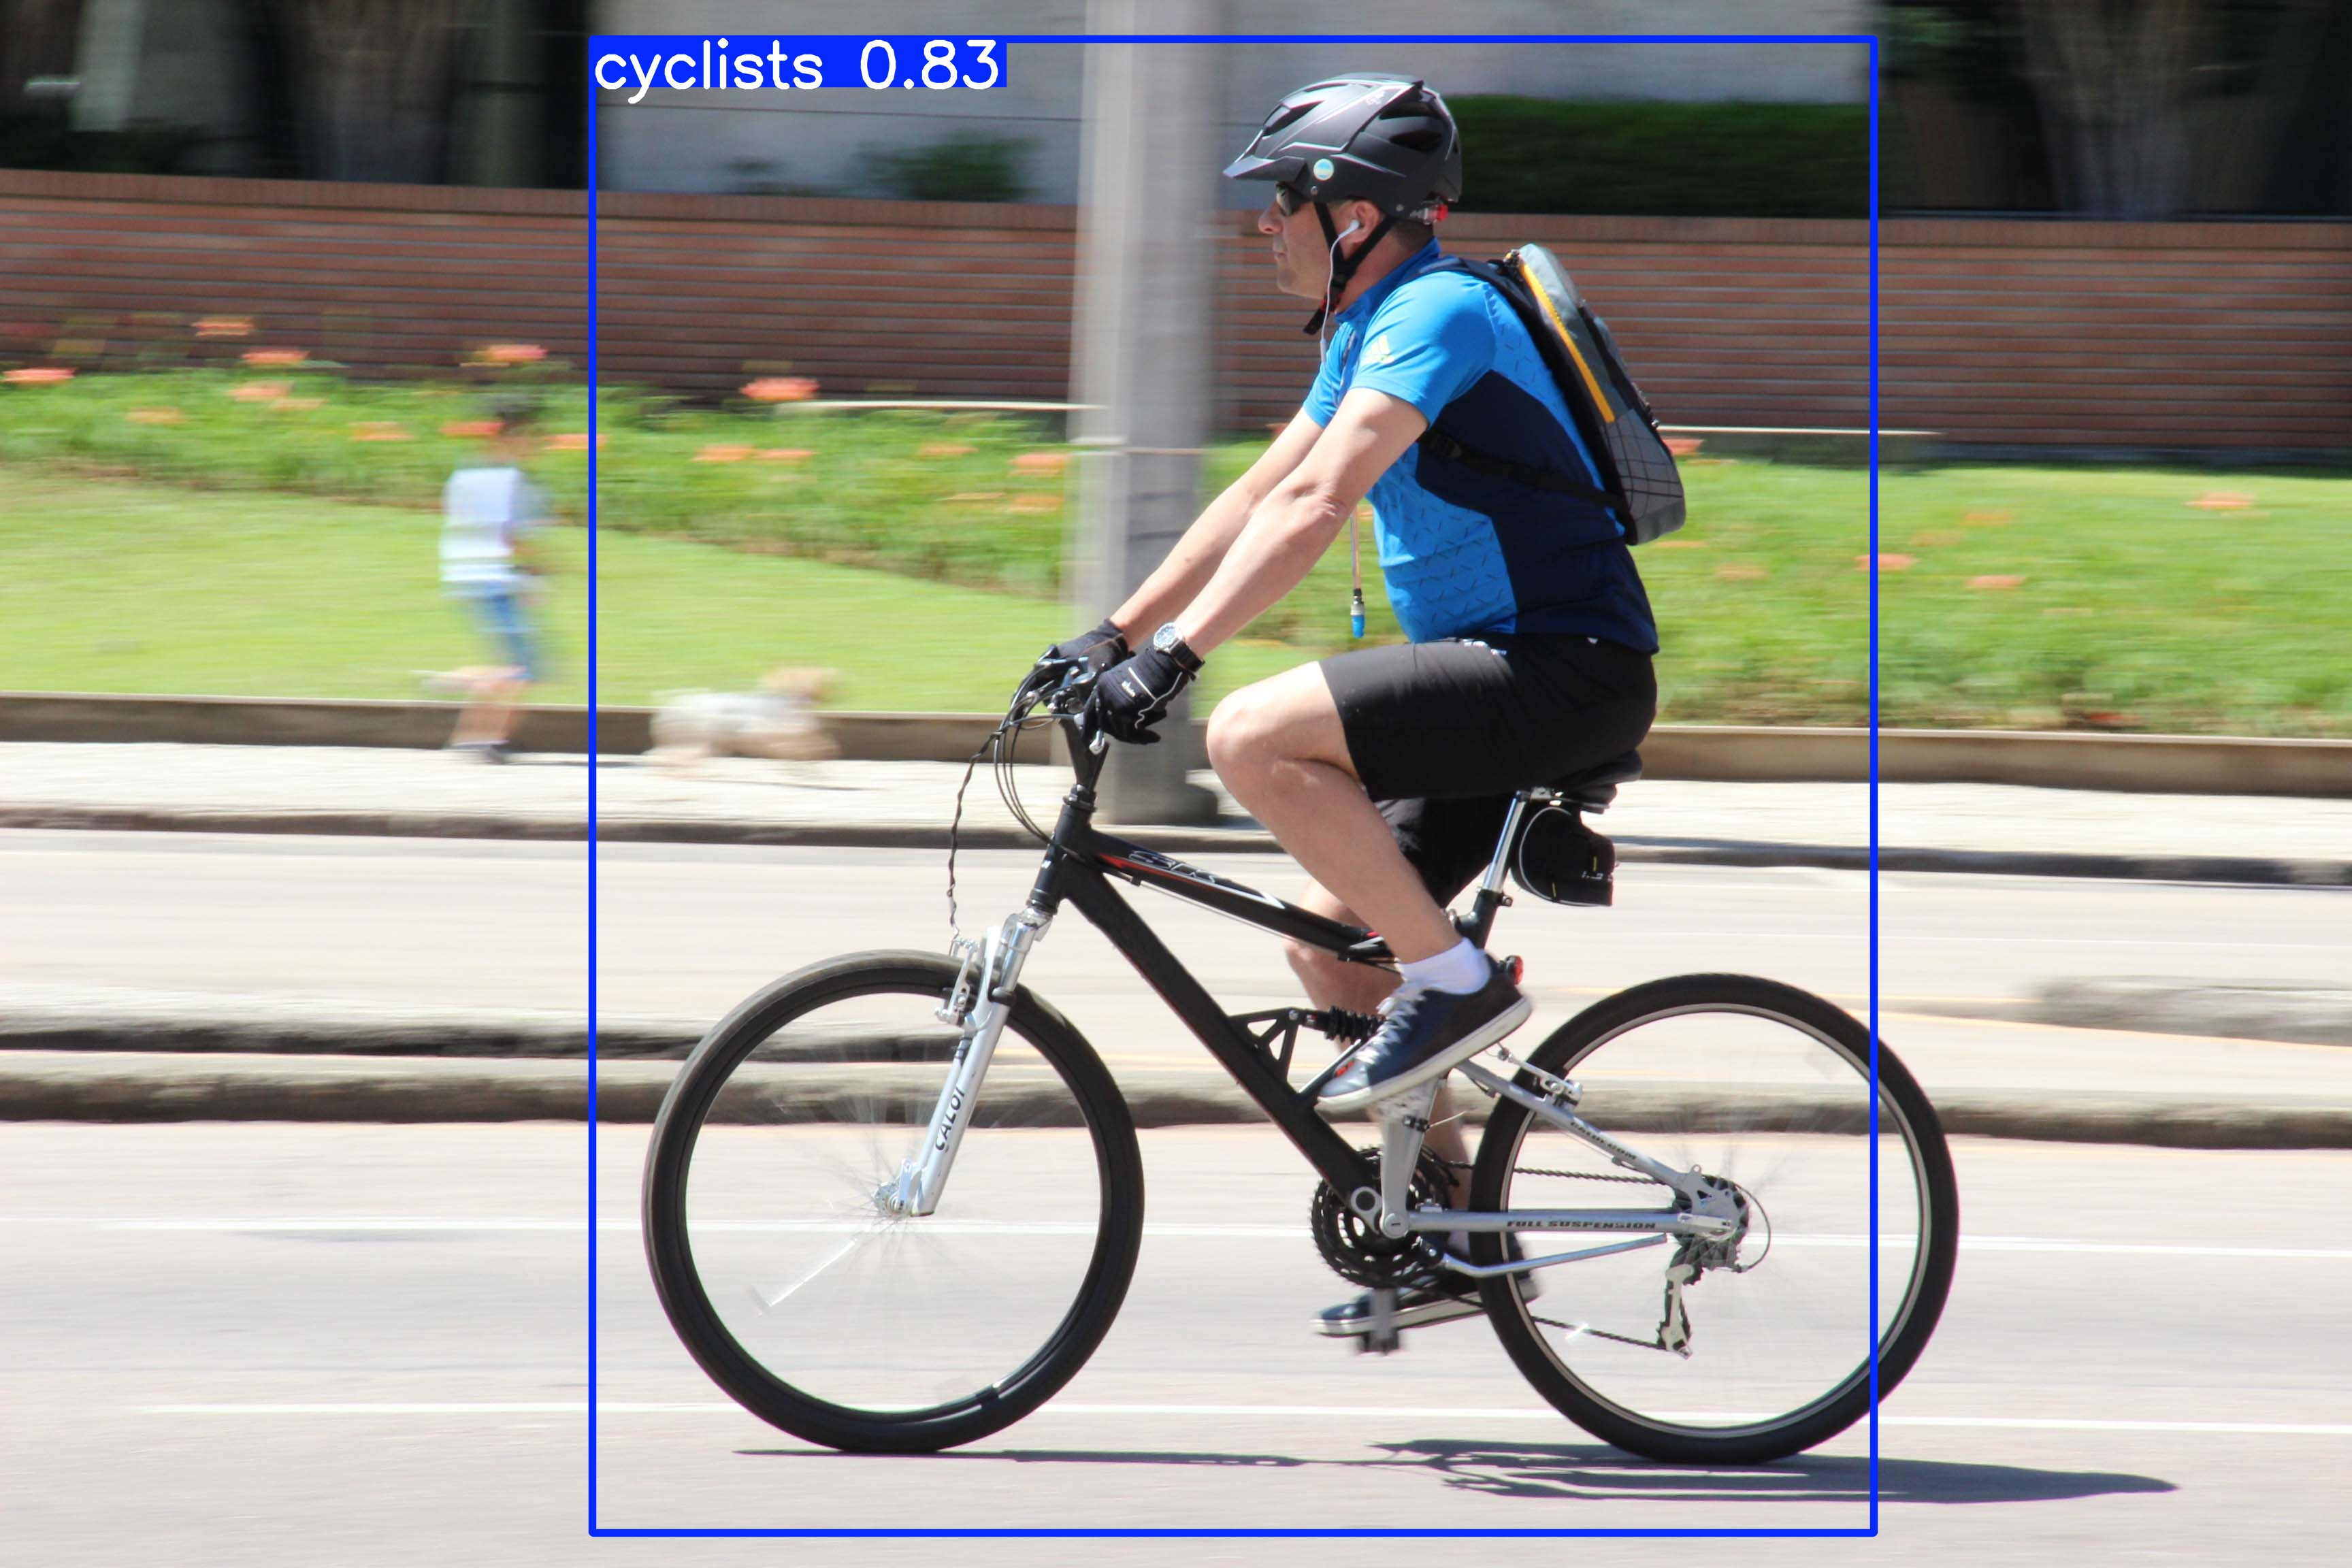

'imagem teste 2'

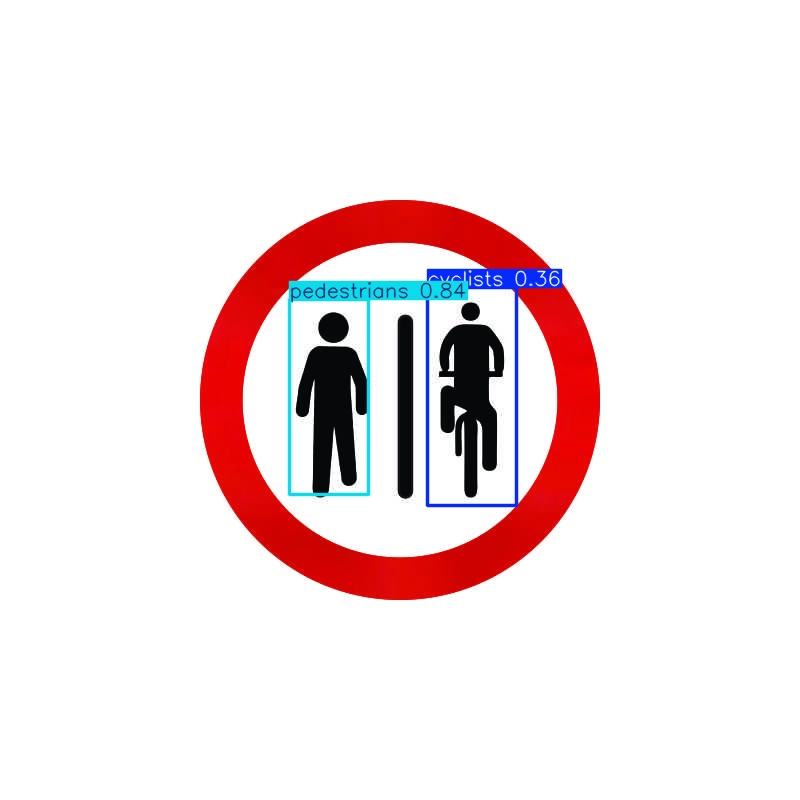

'imagem teste 3'

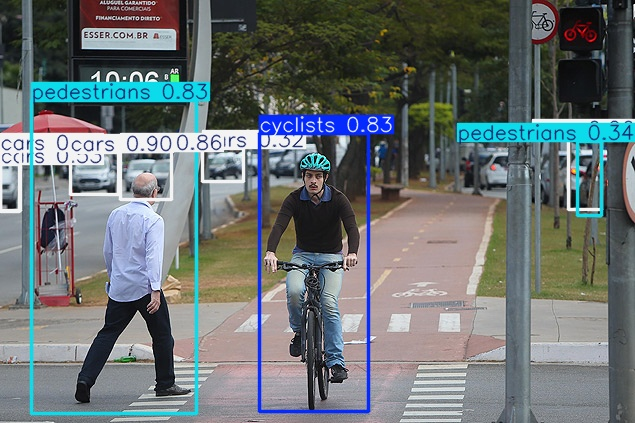

'imagem teste 4'

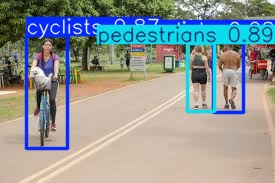

'imagem teste 5'

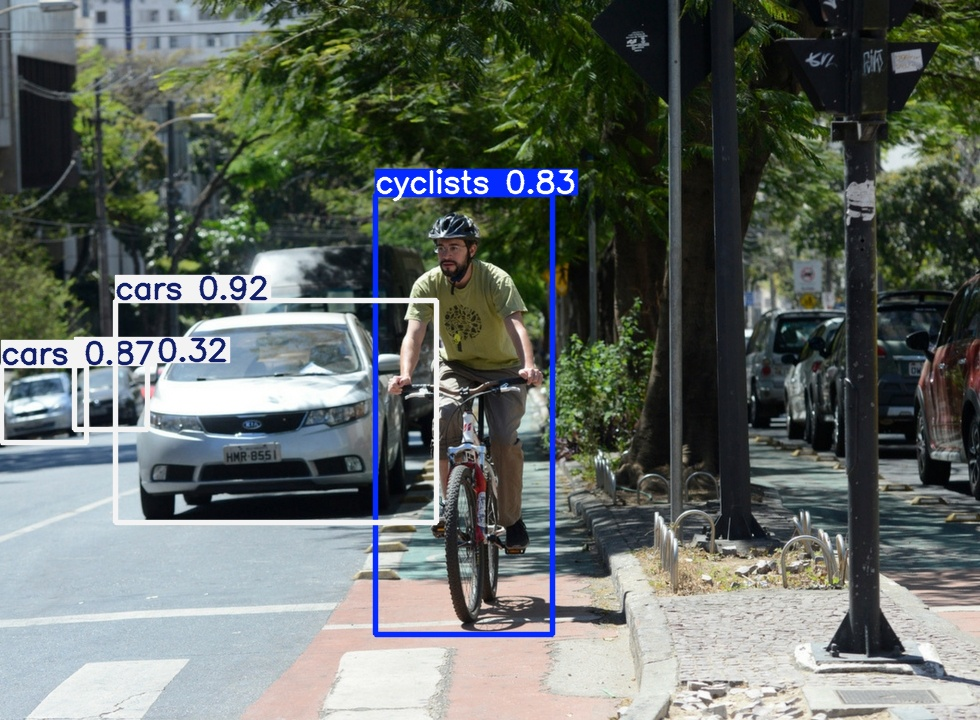

'imagem teste 6'

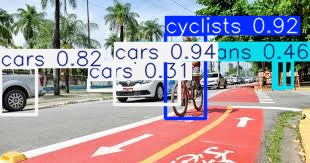

In [8]:
from IPython.display import Image, display
import os
from PIL import Image as PILImage

output_path = '/content/runs/detect/predict/'
image_files = os.listdir(output_path)

for i, image_name in enumerate(image_files, start=1):
    image_path = os.path.join(output_path, image_name)
    with PILImage.open(image_path) as img:
        # Calcula as novas dimensões mantendo a proporção
        max_size = 500
        if img.width > max_size or img.height > max_size:
            scale = min(max_size / img.width, max_size / img.height)
            new_width = int(img.width * scale)
            new_height = int(img.height * scale)
        else:
            new_width, new_height = img.width, img.height

    display(f"imagem teste {i}")
    display(Image(filename=image_path, width=new_width, height=new_height))



E por fim, vamos copiar os resultados das previsões salvas no Colab para o Google Drive, garantindo que eles sejam armazenados de forma persistente.


---
Finally, we will copy the prediction results saved in Colab to Google Drive, ensuring they are stored persistently.


In [9]:
import shutil


# Caminho do diretório de origem e destino
src_dir = '/content/runs'
dest_dir = '/content/gdrive/My Drive/city_dataset/runs'

# Copia o diretório
shutil.copytree(src_dir, dest_dir)


'/content/gdrive/My Drive/city_dataset/runs'